In [189]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm


In [190]:
df=pd.read_csv('total_cases.csv')


In [191]:
df_d=pd.read_csv('total_deaths.csv')

Text(0.5, 1.0, 'Covid-19 deaths in India')

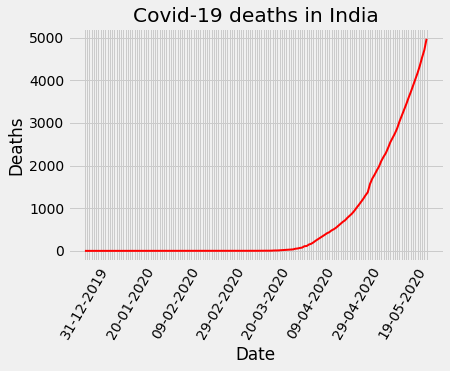

In [240]:
fig, ax = plt.subplots()
plt.plot(df_d['date'],df_d['India'],color='red',linewidth=2)
vals=['31-01-2020','02-02-2020','22-03-2020','22-04-2020']
every_nth = 20
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(axis ='x', rotation = 60) 
plt.xlabel("Date") 
plt.ylabel("Deaths")
plt.title("Covid-19 deaths in India")

Text(0.5, 1.0, 'Covid-19 confirmed cases in India')

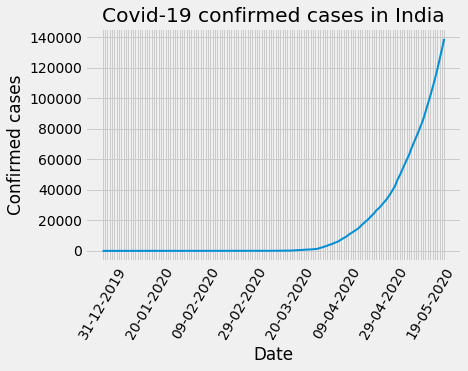

In [193]:
fig, ax = plt.subplots()
plt.plot(df['date'],df['India'],linewidth=2)
vals=['31-01-2020','02-02-2020','22-03-2020','22-04-2020']
every_nth = 20
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(axis ='x', rotation = 60) 
plt.xlabel("Date") 
plt.ylabel("Confirmed cases")
plt.title("Covid-19 confirmed cases in India")

In [194]:
df=df[["date","India"]]
df_d=df_d[["date","India"]]
print(df.values)

[['31-12-2019' 0]
 ['01-01-2020' 0]
 ['02-01-2020' 0]
 ['03-01-2020' 0]
 ['04-01-2020' 0]
 ['05-01-2020' 0]
 ['06-01-2020' 0]
 ['07-01-2020' 0]
 ['08-01-2020' 0]
 ['09-01-2020' 0]
 ['10-01-2020' 0]
 ['11-01-2020' 0]
 ['12-01-2020' 0]
 ['13-01-2020' 0]
 ['14-01-2020' 0]
 ['15-01-2020' 0]
 ['16-01-2020' 0]
 ['17-01-2020' 0]
 ['18-01-2020' 0]
 ['19-01-2020' 0]
 ['20-01-2020' 0]
 ['21-01-2020' 0]
 ['22-01-2020' 0]
 ['23-01-2020' 0]
 ['24-01-2020' 0]
 ['25-01-2020' 0]
 ['26-01-2020' 0]
 ['27-01-2020' 0]
 ['28-01-2020' 0]
 ['29-01-2020' 0]
 ['30-01-2020' 1]
 ['31-01-2020' 1]
 ['01-02-2020' 1]
 ['02-02-2020' 2]
 ['03-02-2020' 2]
 ['04-02-2020' 3]
 ['05-02-2020' 3]
 ['06-02-2020' 3]
 ['07-02-2020' 3]
 ['08-02-2020' 3]
 ['09-02-2020' 3]
 ['10-02-2020' 3]
 ['11-02-2020' 3]
 ['12-02-2020' 3]
 ['13-02-2020' 3]
 ['14-02-2020' 3]
 ['15-02-2020' 3]
 ['16-02-2020' 3]
 ['17-02-2020' 3]
 ['18-02-2020' 3]
 ['19-02-2020' 3]
 ['20-02-2020' 3]
 ['21-02-2020' 3]
 ['22-02-2020' 3]
 ['23-02-2020' 3]
 ['24-02-2

Text(0.5, 1.0, 'Confirmed cases- Autocorrelation')

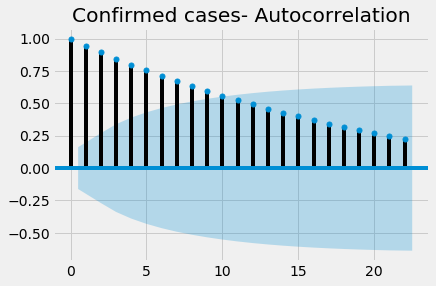

In [195]:
#autocorrelation of confirmed
x=df['date']
y=df['India']
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y)
plt.title('Confirmed cases- Autocorrelation')

Text(0.5, 1.0, 'Deaths due to Covid-19- Autocorrelation')

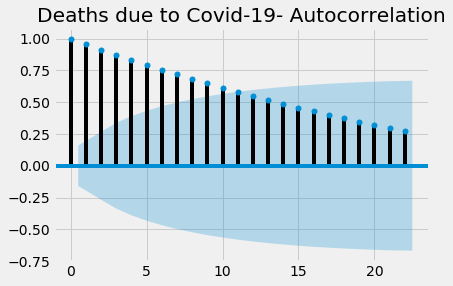

In [196]:
#autocorrelation of deaths
x1=df_d['date']
y1=df_d['India']
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y1)
plt.title('Deaths due to Covid-19- Autocorrelation')

Text(0.5, 1.0, 'Deaths due to Covid-19- Parital Autocorrelation')

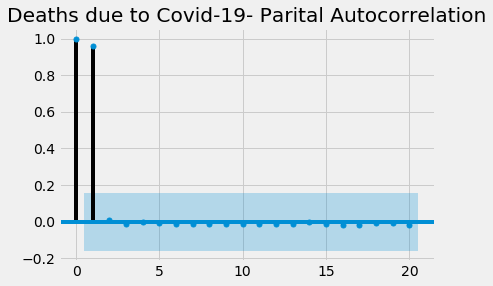

In [197]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(y1,lags=20)
plt.title('Deaths due to Covid-19- Parital Autocorrelation')
#blue portion ko only two lags are crossing hence value of q is 2

In [198]:
#Autocorrelation is clearly exponentially decaying
# from pandas.plotting import autocorrelation_plot
# autocorrelation_plot(y)
# plt.grid(True)
# plt.show()

# p value is around 10
#d always has max value of 2



Text(0.5, 1.0, 'Confirmed cases- Parital Autocorrelation')

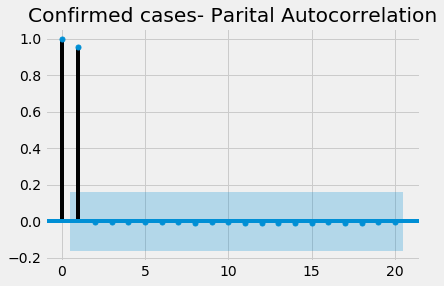

In [199]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(y,lags=20)
plt.title('Confirmed cases- Parital Autocorrelation')
#blue portion ko only two lags are crossing hence value of q is 2

In [200]:
# #gridsearch for best pdq value
# import warnings
# from pandas import read_csv
# from statsmodels.tsa.arima_model import ARIMA
# from sklearn.metrics import mean_squared_error
 
# # evaluate an ARIMA model for a given order (p,d,q)
# def evaluate_arima_model(X, arima_order):
# 	# prepare training dataset
# 	train_size = int(len(X) * 0.66)
# 	train, test = X[0:train_size], X[train_size:]
# 	history = [x for x in train]
# 	# make predictions
# 	predictions = list()
# 	for t in range(len(test)):
# 		model = ARIMA(history, order=arima_order)
# 		model_fit = model.fit(disp=0)
# 		yhat = model_fit.forecast()[0]
# 		predictions.append(yhat)
# 		history.append(test[t])
# 	# calculate out of sample error
# 	error = mean_squared_error(test, predictions)
# 	return error
 
# # evaluate combinations of p, d and q values for an ARIMA model
# def evaluate_models(dataset, p_values, d_values, q_values):
# 	dataset = dataset.astype('float32')
# 	best_score, best_cfg = float("inf"), None
# 	for p in p_values:
# 		for d in d_values:
# 			for q in q_values:
# 				order = (p,d,q)
# 				try:
# 					mse = evaluate_arima_model(dataset, order)
# 					if mse < best_score:
# 						best_score, best_cfg = mse, order
# 					print('ARIMA%s MSE=%.3f' % (order,mse))
# 				except:
# 					continue
# 	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
# # load dataset
# series = read_csv('total_cases.csv', header=0, index_col=0)
# # evaluate parameters
# p_values = [1]
# d_values = range(0, 3)
# q_values = range(0, 3)
# warnings.filterwarnings("ignore")
# evaluate_models(series.values, p_values, d_values, q_values)

In [201]:
# p_values=range(0,3)
# d_values=q_values=range(0,3)
# evaluate_models(y,p_values,d_values,q_values)

In [202]:
from statsmodels.tsa.arima_model import ARIMA
p=range(0,3)
d=range(0,3)
q=[0]
pdq = list(itertools.product(p, d, q))
for param in pdq:
    try:
        mod =ARIMA(y,order=param)
        results= mod.fit()
        print('ARIMA{}- AIC value:{},BIC value:{}'.format(param,results.aic,results.bic))
    except:
        continue

ARIMA(0, 0, 0)- AIC value:3467.723355856748,BIC value:3473.7042210303057
ARIMA(0, 1, 0)- AIC value:2584.5924012761952,BIC value:2590.559614519612
ARIMA(0, 2, 0)- AIC value:2014.7055375149587,BIC value:2020.6590049998
ARIMA(1, 0, 0)- AIC value:2653.2958386654695,BIC value:2662.267136425806
ARIMA(1, 1, 0)- AIC value:2054.9241478250956,BIC value:2063.8749676902207
ARIMA(1, 2, 0)- AIC value:1989.2416298527107,BIC value:1998.1718310799724
ARIMA(2, 1, 0)- AIC value:2035.6426195761192,BIC value:2047.5770460629526
ARIMA(2, 2, 0)- AIC value:1990.6494795903022,BIC value:2002.5564145599844


In [203]:
mod1 =ARIMA(y1,order=(2,2,0))
results_deaths= mod1.fit()

In [204]:
###RELEVANT for confirmed
from statsmodels.tsa.arima_model import ARIMA
p=range(0,3)
d=range(0,3)
q=[0]
pdq = list(itertools.product(p, d, q))
for param in pdq:
    try:
        mod =ARIMA(y1,order=param)
        results_deaths= mod.fit()
        print('ARIMA{}- AIC:{},BIC:{}'.format(param,results.aic,results.bic))
    except:
        continue


ARIMA(0, 0, 0)- AIC:1990.6494795903022,BIC:2002.5564145599844
ARIMA(0, 1, 0)- AIC:1990.6494795903022,BIC:2002.5564145599844
ARIMA(0, 2, 0)- AIC:1990.6494795903022,BIC:2002.5564145599844
ARIMA(1, 0, 0)- AIC:1990.6494795903022,BIC:2002.5564145599844
ARIMA(1, 1, 0)- AIC:1990.6494795903022,BIC:2002.5564145599844
ARIMA(1, 2, 0)- AIC:1990.6494795903022,BIC:2002.5564145599844
ARIMA(2, 1, 0)- AIC:1990.6494795903022,BIC:2002.5564145599844
ARIMA(2, 2, 0)- AIC:1990.6494795903022,BIC:2002.5564145599844


In [205]:
# p=range(7,0,-1)
# d=q=range(2,0,-1)
# pdq = list(itertools.product(p, d, q))
# for param in pdq:
#     try:
#         mod =Arima(y,order=param)
#         results=mod.fit()
#         print('ARIMA{}- AIC:'.format(param))
#     except:
#         continue


In [206]:
mod =ARIMA(y,order=(2,2,0))
results=mod.fit()
print(results.summary())    
#arl5 coeff is close to 0 so we can remodel data again with (6,2,2)
#https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/time-series/how-to/arima/interpret-the-results/key-results/?SID=117600

                             ARIMA Model Results                              
Dep. Variable:               D2.India   No. Observations:                  145
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -991.325
Method:                       css-mle   S.D. of innovations            225.227
Date:                Mon, 01 Jun 2020   AIC                           1990.649
Time:                        00:39:22   BIC                           2002.556
Sample:                             2   HQIC                          1995.488
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             47.9291     14.145      3.388      0.001      20.205      75.653
ar.L1.D2.India    -0.3877      0.083     -4.686      0.000      -0.550      -0.226
ar.L2.D2.India     0.0636      0.083

In [230]:
mod =ARIMA(y,order=(1,2,0))
results=mod.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.India   No. Observations:                  145
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -991.621
Method:                       css-mle   S.D. of innovations            225.693
Date:                Mon, 01 Jun 2020   AIC                           1989.242
Time:                        00:42:17   BIC                           1998.172
Sample:                             2   HQIC                          1992.870
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             47.8851     13.277      3.607      0.000      21.862      73.908
ar.L1.D2.India    -0.4145      0.075     -5.508      0.000      -0.562      -0.267
                                    

In [208]:
# mod =ARIMA(y,order=(2,2,2))
# results=mod.fit()
# print(results.summary())
#mal1 is close to 0 so we remodel

In [209]:
# mod =ARIMA(y,order=(2,2,1))
# results=mod.fit()
# print(results.summary())

In [234]:
# mod1 =ARIMA(y1,order=(2,2,0))
# results_death=mod1.fit()
# print(results_death.summary())    

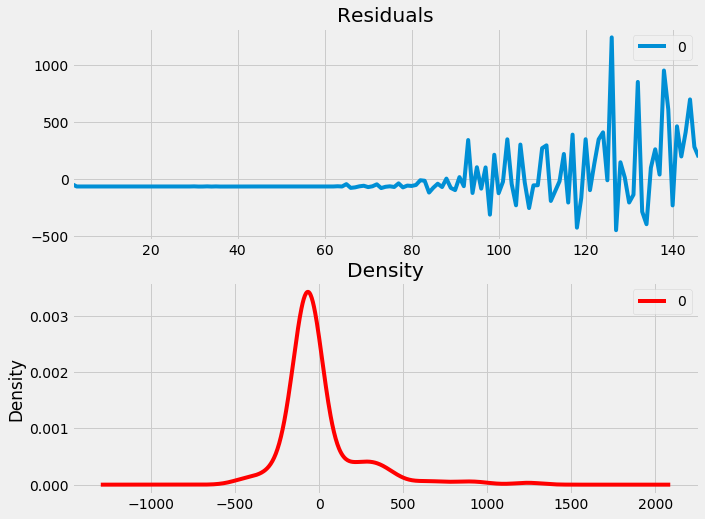

In [211]:
from pandas import DataFrame
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(2,1)
residuals.plot(title="Residuals", ax=ax[0],figsize=(10, 8))
residuals.plot(kind='kde', title='Density', ax=ax[1],figsize=(10, 8),color='r')
plt.show()
#The residual errors seem fine with near zero mea

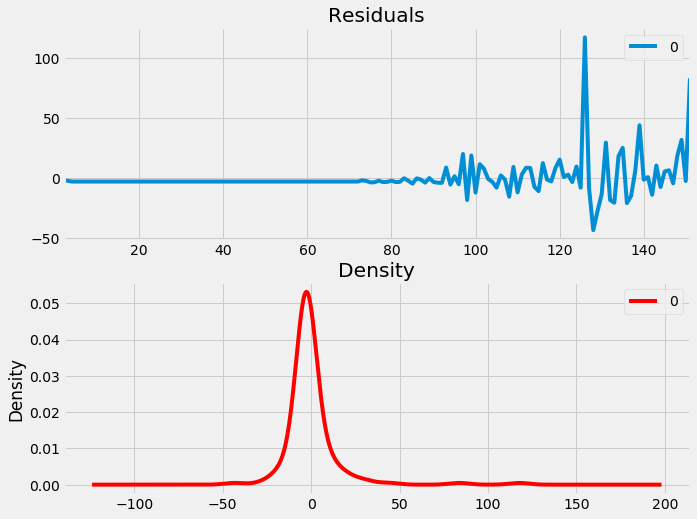

In [212]:
from pandas import DataFrame
residuals = pd.DataFrame(results_death.resid)
fig, ax = plt.subplots(2,1)
residuals.plot(title="Residuals", ax=ax[0],figsize=(10, 8))
residuals.plot(kind='kde', title='Density', ax=ax[1],figsize=(10, 8),color='r')
plt.show()
#The residual errors seem fine with near zero mean

In [213]:
#results.plot_predict(dynamic=False)
# plt.show()
# fig, ax = plt.subplots()
# ax = y.loc['22-03-2020':].plot(ax=ax)
# fig = results.plot_predict(dynamic=True, ax=ax,plot_insample=False)

In [214]:
# y=df['India']
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(y,
#                                             order=param,
#                                             seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)
#             results=mod.fit()
#             print('ARIMA{}x{}1 - AIC:{}'.format(param, param_seasonal, results.aic))
#         except:
#             continue

In [215]:
#clearly the smallest value is 1624.46329
# mod = sm.tsa.statespace.SARIMAX(y,
#                                  order=(7, 2, 2))
# results = mod.fit()
# print(results.summary().tables[1])

In [216]:
# results.plot_diagnostics(figsize=(10, 8))
# plt.show()
# results1.plot_diagnostics(figsize=(10, 8))
# plt.show()

In [228]:
# from statsmodels.tsa.arima_model import ARIMAResults
# from statsmodels.tsa.arima_model import ARIMA
# forecast1,x2,z2=results.forecast(steps=67,alpha=0.05)
# print(forecast1)

In [229]:
# from statsmodels.tsa.arima_model import ARIMAResults
# from statsmodels.tsa.arima_model import ARIMA
# forecast,x,z=results_death.forecast(steps=67,alpha=0.05)
# print(forecast)

In [225]:
# df_r=pd.read_csv('covid_19_clean_complete.csv')
# df_r=df_r.loc[df_r['Country'] == 'India']
# df_r=df_r[['Date','Recovered']]
# print(df_r)

In [226]:
# df_d=pd.read_csv('covid_19_clean_complete.csv')
# df_d=df_d.loc[df_d['Country'] == 'India']
# df_d=df_d[['Date','Deaths']]
# print(df_d)

In [181]:
deaths=np.asarray(df_d['Deaths'])
#print(deaths)
recovered=np.asarray(df_r['Recovered'])
#print(recovered)
total=np.add(deaths,recovered)
print(total)

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     3     3     3     3     3     3     3     3     3     3     3
     3     3     3     3     3     3     3     3     3     3     3     3
     4     5     5     6     6    15    15    17    17    19    25    27
    34    37    50    55    65    93   108   122   134   158   206   263
   264   315   328   511   571   684   846  1020  1257  1411  1539  1752
  1837  2216  2527  2984  3413  3865  4620  5051  5733  6278  6764  7404
  8076  8755  9516 10222 11230 12142 13166 14413 15835 17116 18665 19872
 21402 23181 24843 26835 28951 30618 33011 37095 39820 42389 45611 48856
 52137 55550 58253 61716 64878]


In [227]:
##death rate
# death_rate=np.divide(deaths,total)
# death_rate=death_rate[~np.isnan(death_rate)]
# print(np.mean(death_rate))

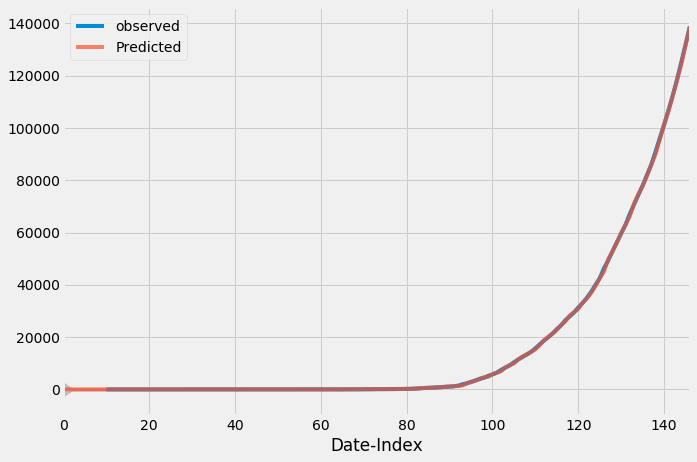

      lower India   upper India
100   5329.127624   6249.047521
101   5944.455136   6864.375034
102   6554.869513   7474.789410
103   7928.752158   8848.672055
104   8893.377541   9813.297439
105   9506.324767  10426.244665
106  10968.251713  11888.171611
107  12152.440402  13072.360300
108  12885.241086  13805.160984
109  13895.457598  14815.377496
110  14922.943634  15842.863532
111  16476.115944  17396.035842
112  18336.098384  19256.018282
113  19573.427014  20493.346911
114  20862.873796  21782.793694
115  22340.879916  23260.799813
116  24218.075122  25137.995020
117  25592.697606  26512.617503
118  27814.997330  28734.917228
119  29091.242577  30011.162475


In [235]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(y, order=(2,2,0))
results = model.fit()
pred = results.get_prediction(start=0, dynamic=False)
pred_ci = pred.conf_int()
ax = y[10:].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(10, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date-Index')
plt.legend()
plt.show()
print(pred_ci[100:120])

In [242]:
print(y1[100:])

100     166
101     199
102     239
103     273
104     308
105     339
106     377
107     414
108     437
109     480
110     507
111     543
112     590
113     640
114     681
115     718
116     775
117     824
118     872
119     934
120    1007
121    1074
122    1147
123    1218
124    1301
125    1373
126    1568
127    1694
128    1783
129    1886
130    1981
131    2109
132    2206
133    2293
134    2415
135    2549
136    2649
137    2752
138    2872
139    3029
140    3163
141    3303
142    3435
143    3583
144    3720
145    3867
146    4021
147    4167
148    4337
149    4531
150    4706
151    4971
Name: India, dtype: int64


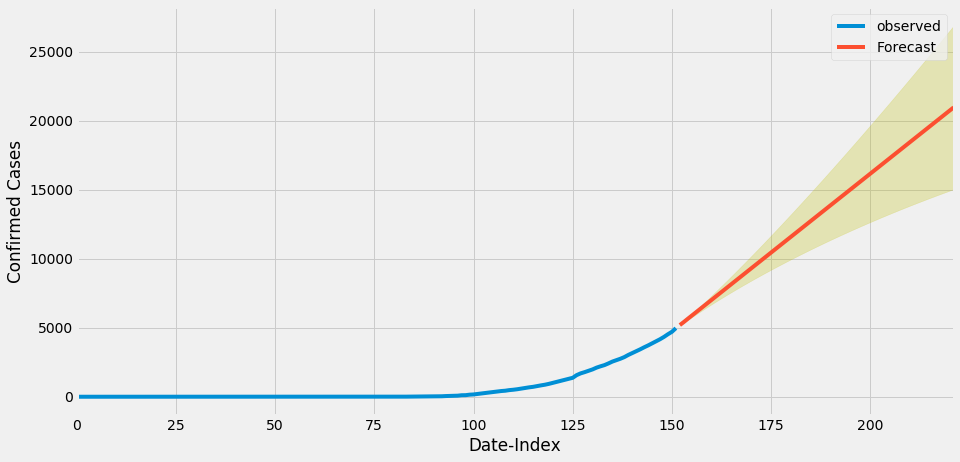

      lower India   upper India
152   5164.032309   5224.521860
153   5362.529019   5470.761943
154   5569.072191   5730.706896
155   5764.870760   5990.620761
156   5957.768857   6253.572744
157   6149.093168   6520.715136
158   6336.780952   6790.108908
159   6521.918083   7062.115765
160   6704.759019   7336.732072
161   6885.156825   7613.614221
162   7063.334392   7892.730001
163   7239.395983   8173.999063
164   7413.392375   8457.310725
165   7585.412584   8742.600931
166   7755.524206   9029.804141
167   7923.783808   9318.856503
168   8090.248337   9609.704317
169   8254.968258   9902.297259
170   8417.989502  10196.588515
171   8579.355187  10492.535387
172   8739.105097  10790.098095
173   8897.276219  11089.239546
174   9053.903190  11389.925155
175   9209.018434  11692.122499
176   9362.652406  11995.801110
177   9514.833800  12300.932298
178   9665.589702  12607.488981
179   9814.945733  12915.445533
180   9962.926184  13224.777666
181  10109.554119  13535.462314
..      

In [243]:
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX

pred_ = results_death.get_forecast(steps=70)
pred_conf = pred_.conf_int()
ax = y1.plot(label='observed', figsize=(14, 7))
pred_.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='y', alpha=.25)
ax.set_xlabel('Date-Index')
ax.set_ylabel('Deaths')
plt.legend()
plt.show()
#print(pred_uc)
print(pred_conf)
#print(df['Date-index'])

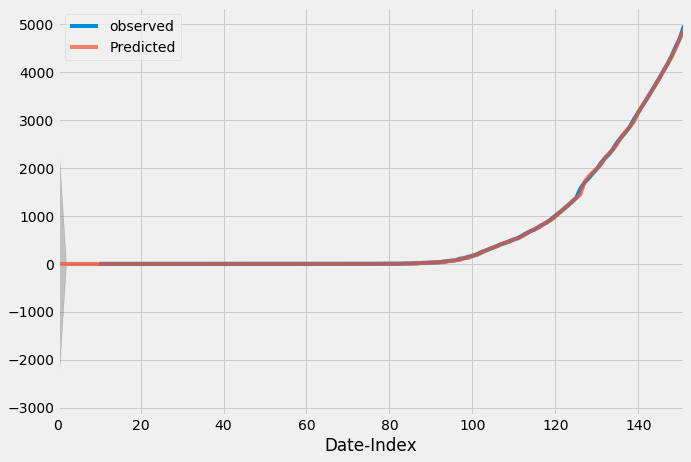

     lower India  upper India
100   145.002282   205.491833
101   154.564983   215.054535
102   197.984903   258.474455
103   241.150788   301.640339
104   278.106739   338.596291
105   313.735505   374.225057
106   341.570777   402.060329
107   382.139203   442.628755
108   419.525522   480.015074
109   437.232053   497.721605
110   485.922246   546.411798
111   507.026704   567.516255
112   548.099766   608.589317
113   598.831759   659.321311
114   655.462865   715.952417
115   695.653153   756.142704
116   729.064985   789.554537
117   792.428038   852.917590
118   841.896756   902.386308
119   892.266834   952.756385


In [220]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model1 = SARIMAX(y1, order=(2,2,0))
results_death = model1.fit()
pred = results_death.get_prediction(start=0, dynamic=False)
pred_ci = pred.conf_int()
ax = y1[10:].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(10, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date-Index')
plt.legend()
plt.show()
print(pred_ci[100:120])

In [221]:
pred_uc = results.get_forecast(steps=70)
pred_ci = pred_uc.conf_int()
ax = y1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Cases')
plt.legend()
plt.show()
print(pred_ci)
print(df['Date-index'])

AttributeError: 'ARIMAResults' object has no attribute 'get_forecast'

In [357]:
y_forecasted = pred.predicted_mean[110:]
y_truth = y1[110:]
x=((abs(((y_truth-y_forecasted)/y_truth))))
error=(np.mean(x))*100
print(error)

0.9618234557859561


In [69]:
##DEATH  RATE 
